In [1]:
# General Imports
import pandas as pd
import matplotlib.pyplot as plt
import random
import geopandas
import copy
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import Dataset
from torchvision.transforms import transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import ToTensor

import warnings
import random
import time

import skimage
from skimage.transform import rescale
import cv2

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

In [2]:
# local imports
from dataloader_v5 import Dataset

In [3]:
# define paths
spot6_mosaic = '/home/simon/CDE_UBS/thesis/data_collection/spot6/spot6_mosaic.tif'
spot6_path = "/home/simon/CDE_UBS/thesis/data_collection/spot6/"
sen2_path = "/home/simon/CDE_UBS/thesis/data_collection/sen2/merged_reprojected/"
closest_dates_filepath = "/home/simon/CDE_UBS/thesis/data_loader/data/closest_dates.pkl"

# get dataset object
dataset = Dataset(spot6_mosaic,sen2_path,spot6_path,closest_dates_filepath,window_size=500,factor=(10/1.5))
loader = DataLoader(dataset,batch_size=1, shuffle=True, num_workers=1)
print("Loader Length: ",len(loader))

precalculated dataset file found, loading...

Dataset Object successfully instanciated!
Loader Length:  68150


# Test Interpolation and Loss

In [27]:
def interpolate(img):
    """
    Input:
        - Image
    Output:
        - Image upsampled to 75*75
    """
    #img = rescale(img,6.6666666666666)
    img = cv2.resize(img, (500,500))
    return(img)

# https://arxiv.org/abs/1603.08155
# https://scikit-image.org/docs/dev/auto_examples/transform/plot_ssim.html


def downsample(img):
    """
    Input:
        - Image
    Output:
        - Image downsampled to 75*75
    """
    img = cv2.resize(img, (75,75))
    return(img)
    
    
def ssim_calc(a,b):
    ssim_const = ssim(a, b,data_range=b.max() - b.min(),multichannel=True)
    return(ssim_const)


def mse_gray(a,b):
    a,b = np.dot(a[...,:3], [0.2989, 0.5870, 0.1140]),np.dot(b[...,:3], [0.2989, 0.5870, 0.1140])
    a,b = np.ndarray.flatten(a),np.ndarray.flatten(b)
    mse = (np.square(a - b)).mean(axis=None)
    return(mse)

def mse_rgb(a,b):
    a,b = np.ndarray.flatten(a),np.ndarray.flatten(b)
    mse = (np.square(a - b)).mean(axis=None)
    return(mse)
    
def mae_gray(a,b):
    from sklearn.metrics import mean_absolute_error
    a,b = np.dot(a[...,:3], [0.2989, 0.5870, 0.1140]),np.dot(b[...,:3], [0.2989, 0.5870, 0.1140])
    a,b = np.ndarray.flatten(a),np.ndarray.flatten(b)
    mae = mean_absolute_error(a, b)
    return(mae)

def mae_rgb(a,b):
    from sklearn.metrics import mean_absolute_error
    a,b = np.ndarray.flatten(a),np.ndarray.flatten(b)
    mae = mean_absolute_error(a, b)
    return(mae)

#Implement the following as losses

# implement lpips, https://github.com/richzhang/PerceptualSimilarity
# MSE pixel-wise
# PSNR - peak signal to noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


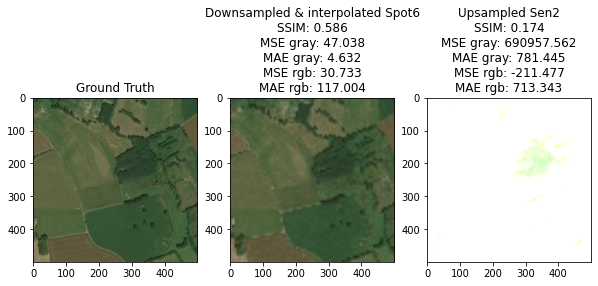

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


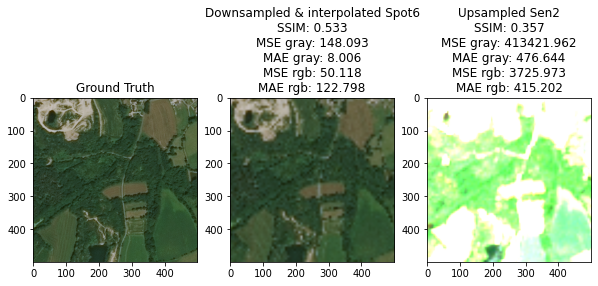

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


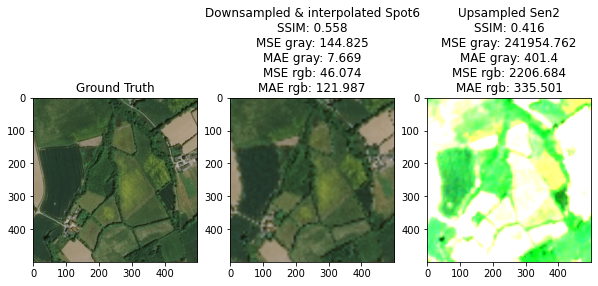

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


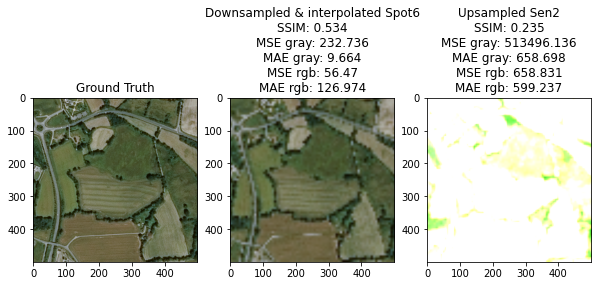

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


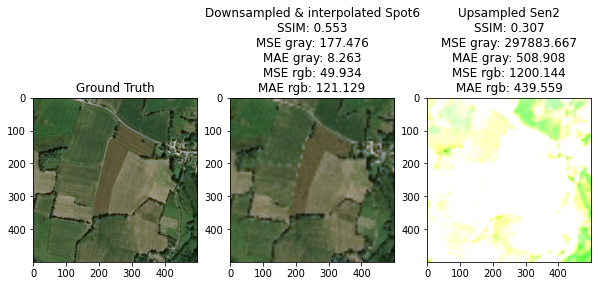

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


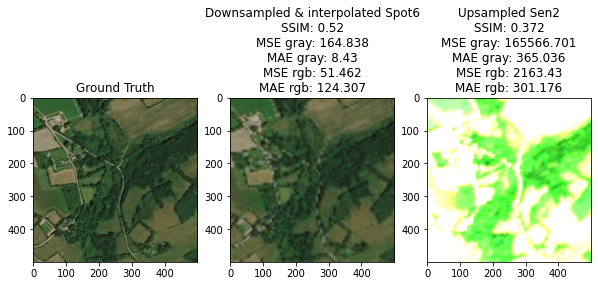

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


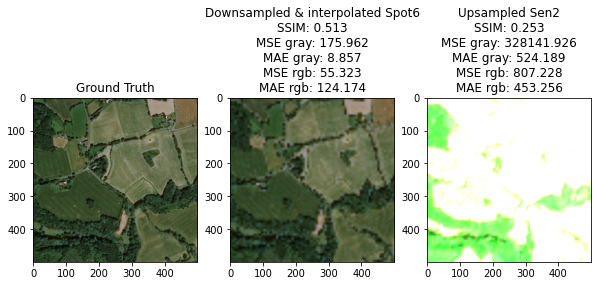

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


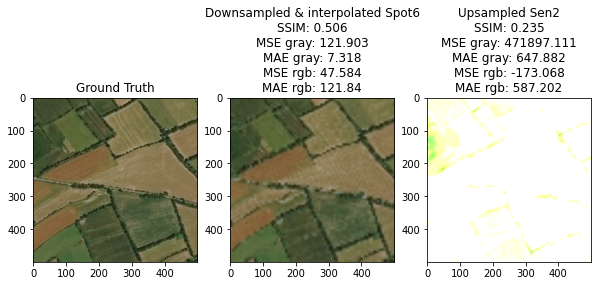

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


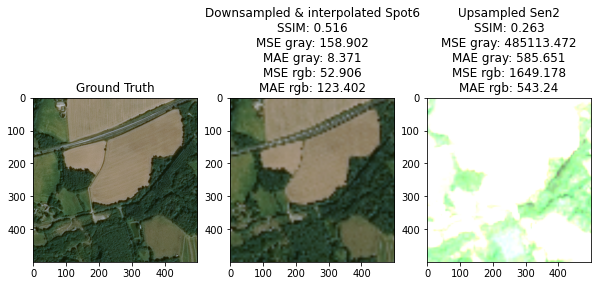

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


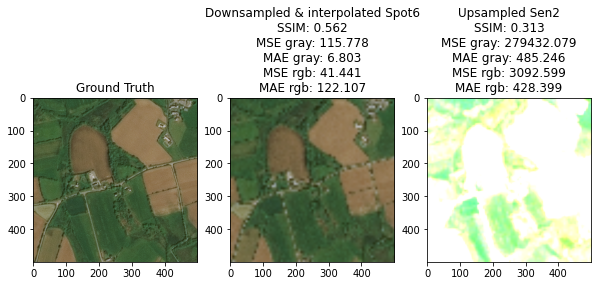

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


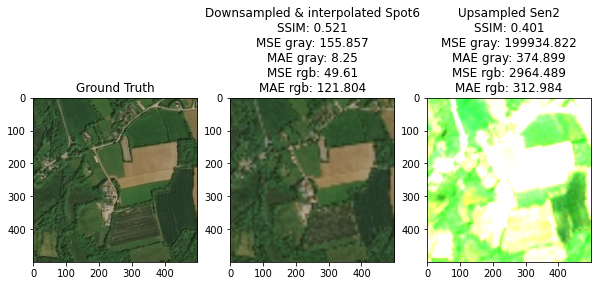

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


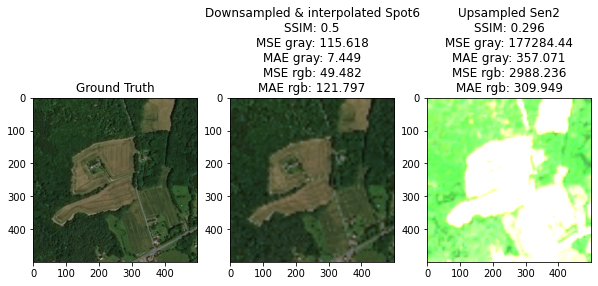

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


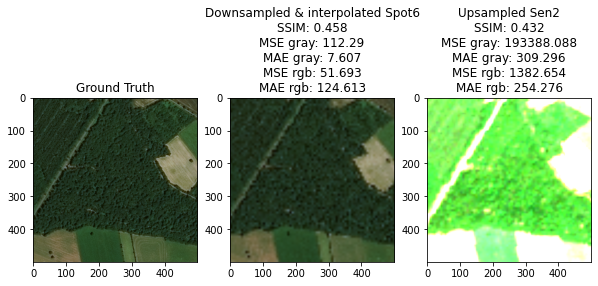

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


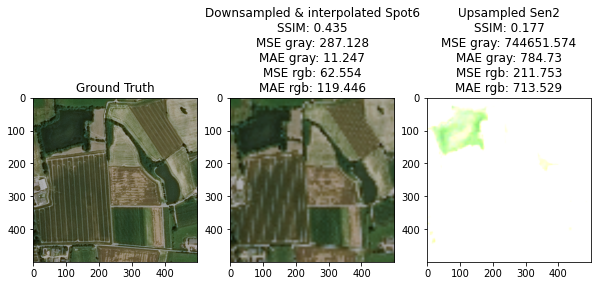

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


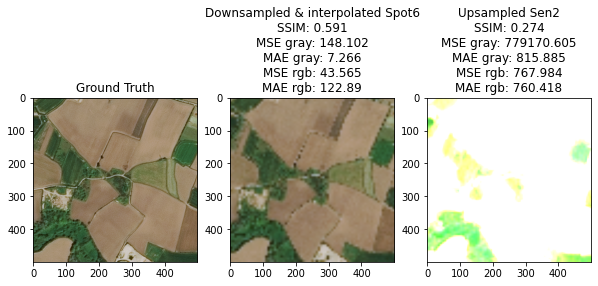

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


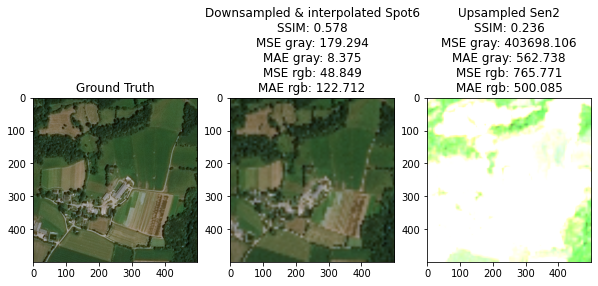

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


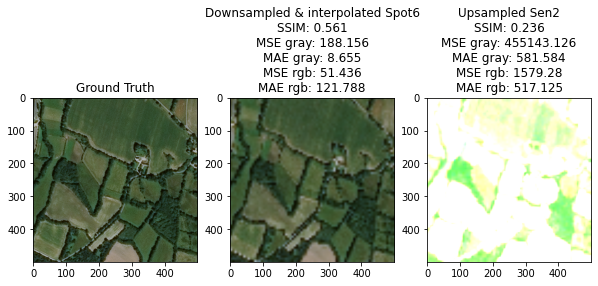

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


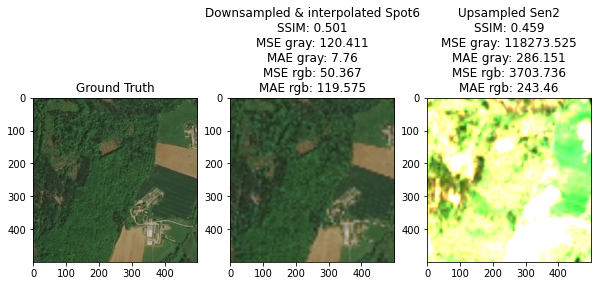

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


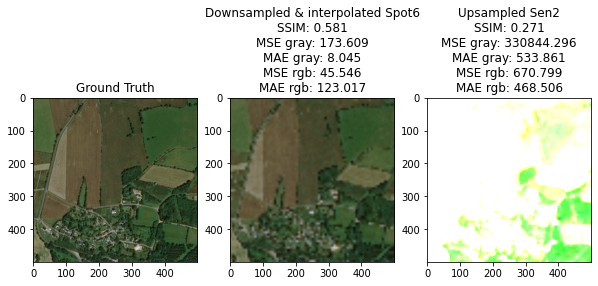

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


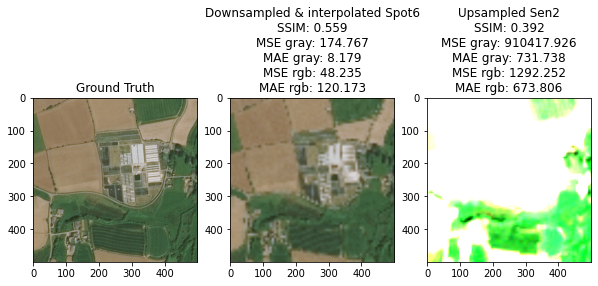

In [31]:
for i in range(0,20):
    a,b = dataset.__getitem__(random.randint(0,len(dataset)))
    a = np.transpose(a,(1,2,0))
    b = np.transpose(b,(1,2,0))
    
    ssim_upsampled_sen2 = round(ssim_calc(a,interpolate(b)),3)
    ssim_upsampled_spot6 = round(ssim_calc(a,interpolate(downsample(a))),3)
    mse_gray_sen2 = round(mse_gray(a,interpolate(b)),3)
    mse_gray_spot6 = round(mse_gray(a,interpolate(downsample(a))),3)
    mae_gray_sen2 = round(mae_gray(a,interpolate(b)),3)
    mae_gray_spot6 = round(mae_gray(a,interpolate(downsample(a))),3)
    mae_rgb_sen2 = round(mae_rgb(a,interpolate(b)),3)
    mae_rgb_spot6 = round(mae_rgb(a,interpolate(downsample(a))),3)
    mse_rgb_sen2 = round(mse_rgb(a,interpolate(b)),3)
    mse_rgb_spot6 = round(mse_rgb(a,interpolate(downsample(a))),3)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10,5))
    #fig.suptitle("Similarity Test")
    ax1.imshow(a)
    ax1.set_title("Ground Truth")
    ax2.imshow(interpolate(downsample(a)))
    ax2.set_title("Downsampled & interpolated Spot6\nSSIM: "+str(ssim_upsampled_spot6)+"\nMSE gray: "+str(mse_gray_spot6)+
                 "\nMAE gray: "+str(mae_gray_spot6)+"\nMSE rgb: "+str(mse_rgb_spot6)+
                 "\nMAE rgb: "+str(mae_rgb_spot6))
    ax3.imshow(interpolate(b))
    ax3.set_title("Upsampled Sen2\nSSIM: "+str(ssim_upsampled_sen2)+"\nMSE gray: "+str(mse_gray_sen2)+
                 "\nMAE gray: "+str(mae_gray_sen2)+"\nMSE rgb: "+str(mse_rgb_sen2)+
                 "\nMAE rgb: "+str(mae_rgb_sen2))
    plt.show()